In [128]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import feature_engine.transformation as vt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
data = pd.read_csv(
    filepath_or_buffer="./data/winequality-red.csv",
)
data.sample(n=5)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
891,7.2,0.660,0.03,2.3,0.078,16.0,86.0,0.99743,3.53,0.57,9.7,5
844,9.9,0.250,0.46,1.7,0.062,26.0,42.0,0.99590,3.18,0.83,10.6,6
1334,7.2,0.835,0.00,2.0,0.166,4.0,11.0,0.99608,3.39,0.52,10.0,5
672,9.8,1.240,0.34,2.0,0.079,32.0,151.0,0.99800,3.15,0.53,9.5,5
723,7.1,0.310,0.30,2.2,0.053,36.0,127.0,0.99650,2.94,1.62,9.5,5


In [129]:
data.dtypes

fixed acidity           float64
volatile acidity        float64
citric acid             float64
residual sugar          float64
chlorides               float64
free sulfur dioxide     float64
total sulfur dioxide    float64
density                 float64
pH                      float64
sulphates               float64
alcohol                 float64
quality                   int64
dtype: object

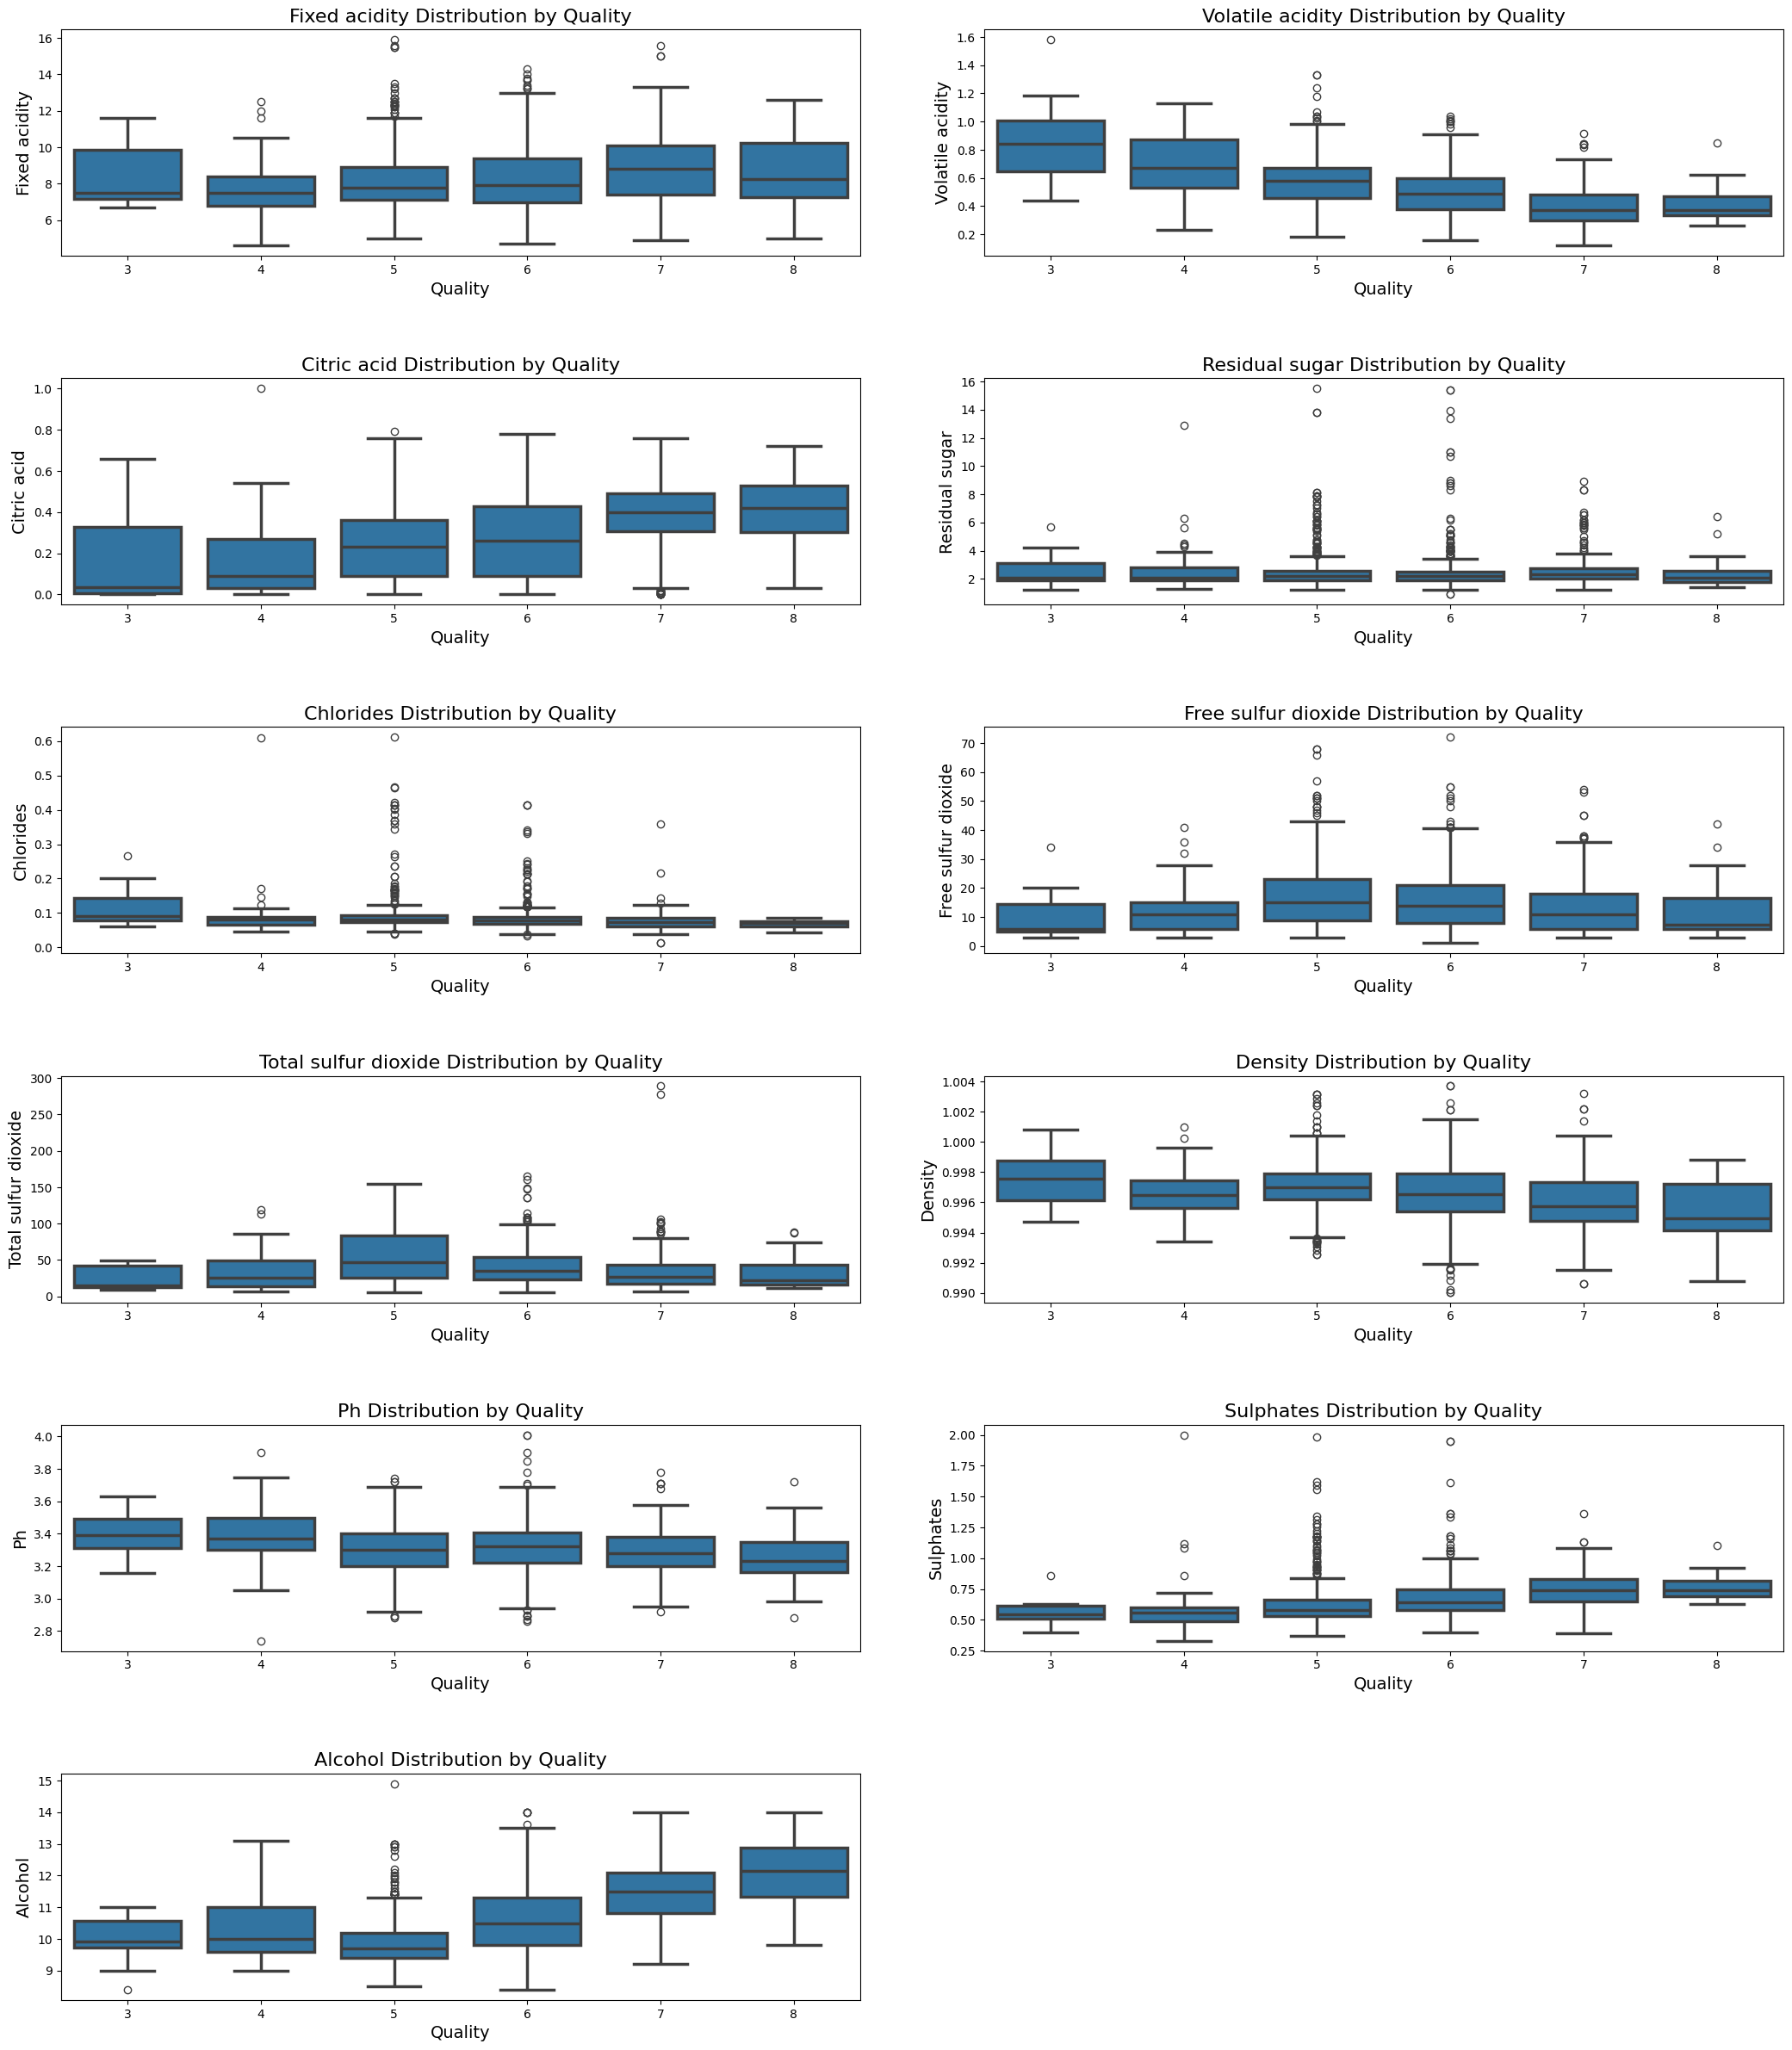

In [130]:
plt.figure(figsize=(22, 25))



columns = ['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',

           'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',

           'pH', 'sulphates', 'alcohol']



for i in range(1, 12):

    plt.subplot(6, 2, i)

    sns.boxplot(x='quality', y=columns[i-1], data=data, linewidth=2.5, fliersize=6)

    plt.title(f'{columns[i-1].capitalize()} Distribution by Quality', fontsize=16)

    plt.xlabel('Quality', fontsize=14)

    plt.ylabel(columns[i-1].capitalize(), fontsize=14)



plt.tight_layout(pad=5.0)

plt.show()

In [131]:
#except pH
cols = ['fixed acidity', 'volatile acidity', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide',
       'sulphates', 'alcohol']

In [132]:
data[cols] = data[cols].apply(np.log1p)

In [133]:
data['quality'].value_counts()

quality
5    681
6    638
7    199
4     53
8     18
3     10
Name: count, dtype: int64

In [134]:
bins = (2, 4, 6, 9)
group_names = ['bad', 'good', 'excellence']
data['quality'] = pd.cut(data['quality'], bins=bins, labels=group_names)

In [135]:
encoder = LabelEncoder()
data['quality'] = encoder.fit_transform(data['quality'])
data['quality'].value_counts()

quality
2    1319
1     217
0      63
Name: count, dtype: int64

In [136]:
# let's separate into training and testing set
X_train, X_test, y_train, y_test = train_test_split(data.drop('quality', axis=1),
                                                    data['quality'],
                                                    test_size=0.3,
                                                    random_state=0)

X_train.shape, X_test.shape

((1119, 11), (480, 11))

In [137]:
# set up the scaler
scaler = StandardScaler()

# fit the scaler to the train set, it will learn the parameters
scaler.fit(X_train)

# transform train and test sets
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

In [138]:
model = LogisticRegression()
model.fit(X_train, y_train)

LogisticRegression()

In [139]:
y_pred = model.predict(X_test)

In [140]:
#print accuracy
print(model.score(X_train, y_train))
print(model.score(X_test, y_test))

0.8328865058087578
0.8604166666666667


In [141]:
import pickle

In [142]:
with open(file="lr.pkl", mode="wb") as lr_file:
    pickle.dump(obj=model, file=lr_file)

In [143]:
with open(file="lr.pkl", mode="rb") as lr_file:
    lr_loaded = pickle.load(file=lr_file)
    print(lr_loaded)

LogisticRegression()


In [144]:
lr_loaded.score(X=X_test, y=y_test)

0.8604166666666667

In [149]:
data.drop('quality', axis=1).columns.to_list()

['fixed acidity',
 'volatile acidity',
 'citric acid',
 'residual sugar',
 'chlorides',
 'free sulfur dioxide',
 'total sulfur dioxide',
 'density',
 'pH',
 'sulphates',
 'alcohol']

In [151]:
with open(file="le.pkl", mode="wb") as le_file:
    pickle.dump(obj=encoder, file=le_file)

In [152]:
with open(file="ss.pkl", mode="wb") as ss_file:
    pickle.dump(obj=scaler, file=ss_file)